In [1]:
from models import Dim
from datasets import coil2000
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Artificial Dataset

('7Dim', 'LLE', 'k=30-reg=0.001'): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]


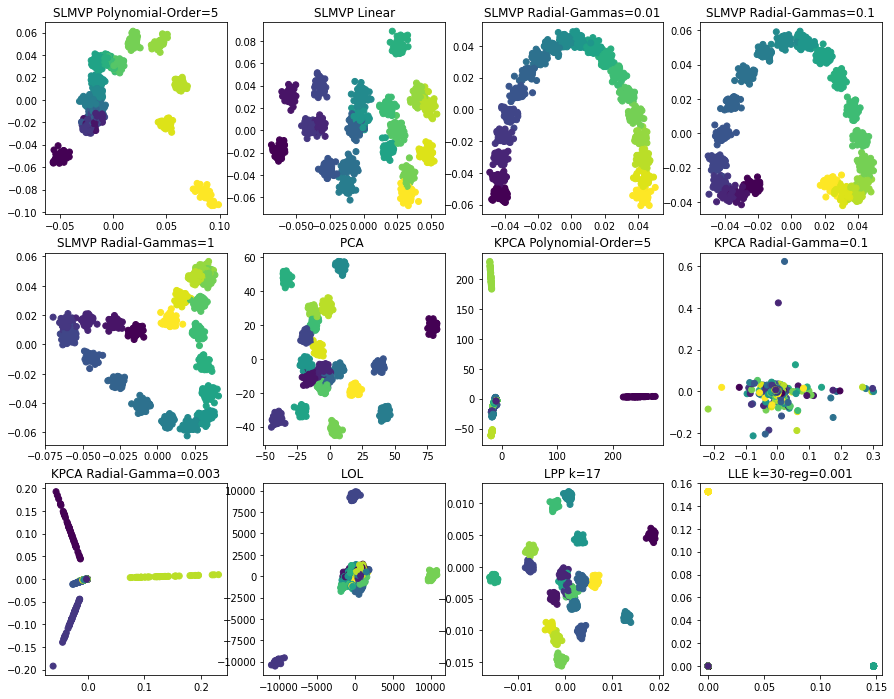

In [11]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=300, centers=20,
                  cluster_std=2, random_state=34)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=7)
dim.plot_artificial(n_rows=3, n_cols=4)

In [12]:
dim.apply_clf('KNN')

KNN: 100%|██████████| 12/12 [00:21<00:00,  1.82s/it]


,Best Score,Params,Dimensions,Dim. Technique,Dim. Params
0,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Polynomial-Order=5
1,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Linear
2,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Radial-Gammas=0.01
3,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Radial-Gammas=0.1
4,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Radial-Gammas=1
5,1.00,{'knn__n_neighbors': 3},7Dim,PCA,
6,1.00,{'knn__n_neighbors': 3},7Dim,KPCA,Polynomial-Order=5
9,1.00,{'knn__n_neighbors': 3},7Dim,LOL,
10,1.00,{'knn__n_neighbors': 3},7Dim,LPP,k=17
11,1.00,{'knn__n_neighbors': 3},7Dim,LLE,k=30-reg=0.001


In [13]:
dim.apply_clf('Linear Regression')

Linear Reg.: 100%|██████████| 12/12 [00:00<00:00, 37.99it/s]


,Best Score,Params,Dimensions,Dim. Technique,Dim. Params
9,0.992841,,7Dim,LOL,
2,0.990829,,7Dim,SLMVP,Radial-Gammas=0.01
3,0.989562,,7Dim,SLMVP,Radial-Gammas=0.1
1,0.958516,,7Dim,SLMVP,Linear
4,0.956879,,7Dim,SLMVP,Radial-Gammas=1
0,0.927235,,7Dim,SLMVP,Polynomial-Order=5
10,0.377318,,7Dim,LPP,k=17
5,0.304909,,7Dim,PCA,
6,0.273830,,7Dim,KPCA,Polynomial-Order=5
11,0.267361,,7Dim,LLE,k=30-reg=0.001


In [9]:
dim.apply_clf('XGBoost')

XGBoost:  42%|████▏     | 5/12 [01:41<02:22, 20.38s/it]


KeyboardInterrupt: 

# Kernels

In [6]:
KXX = np.dot(X, X.T)
l = KXX.shape[0]
j = np.ones(l)
KXX = KXX - (np.dot(np.dot(j, j.T), KXX))/l - (np.dot(KXX, np.dot(j, j.T))) / \
    l + (np.dot((np.dot(j.T, np.dot(KXX, j))), np.dot(j, j.T)))/(np.power(l, 2))

In [70]:
y = np.array([y+1 for y in y])

In [71]:
y

array([[3, 2, 1, 1, 4]])

In [72]:
y = np.reshape(y, (1, y.size))
KYY = np.dot(y.T, y)
print(KYY)
l = KYY.shape[0]
j = np.ones(l)
KYY = KYY - (np.dot(np.dot(j, j.T), KYY))/l - (np.dot(KYY, np.dot(j, j.T))) / \
    l + (np.dot((np.dot(j.T, np.dot(KYY, j))), np.dot(j, j.T)))/(np.power(l, 2))

[[ 9  6  3  3 12]
 [ 6  4  2  2  8]
 [ 3  2  1  1  4]
 [ 3  2  1  1  4]
 [12  8  4  4 16]]


In [61]:
KYY

array([[-0.2,  0.8,  0.8,  0.8, -0.2],
       [ 0.8,  0.8,  0.8,  0.8,  0.8],
       [ 0.8,  0.8,  0.8,  0.8,  0.8],
       [ 0.8,  0.8,  0.8,  0.8,  0.8],
       [-0.2,  0.8,  0.8,  0.8, -0.2]])

In [55]:
np.dot(KXX, KYY)

array([[2742.23000597, 3176.76780853, 3611.30561109, 3611.30561109,
        2307.69220341],
       [4131.41253212, 4308.95125807, 4486.48998402, 4486.48998402,
        3953.87380617],
       [1266.88759736, 2391.14704449, 3515.40649161, 3515.40649161,
         142.62815024],
       [1331.44253349, 2459.78849634, 3588.13445918, 3588.13445918,
         203.09657065],
       [3048.24239089, 3238.34107575, 3428.4397606 , 3428.4397606 ,
        2858.14370603]])

In [32]:
KYY = np.dot(y.T, y)
KYY

array([[14]])

In [ ]:
centered_KYY = KYY - (np.dot(np.dot(j, j.T), KYY))/l - (np.dot(KYY, np.dot(j, j.T))) / \
    l + (np.dot((np.dot(j.T, np.dot(KYY, j))), np.dot(j, j.T)))/(np.power(l, 2))
centered_KYY

In [46]:
rbf_kernel(X.T)

array([[1.00000000e+00, 9.52063763e-47, 1.71179053e-27],
       [9.52063763e-47, 1.00000000e+00, 1.45449075e-07],
       [1.71179053e-27, 1.45449075e-07, 1.00000000e+00]])

In [3]:
data = coil2000()
dim = Dim(data.train, data.test, data.col_names)
#dim.unpickle_dim('dim/03-23-20:36.pkl')
dim.apply_dim(num_dim=5)
#dim.pickle_dim(datetime.now().strftime('%m-%d-%H:%M'))

('5Dim', 'LLE', 'k=68-reg=0.001'): 100%|██████████| 1/1 [01:11<00:00, 71.72s/it]


In [12]:
dim.new_dim[('5Dim', 'SLMVP', 'Polynomial-Order=5')][0].shape

(5, 4657)

In [14]:
dim.new_dim[('5Dim', 'KPCA', 'Linear')][1].shape

(5, 1165)

In [1]:
dim.get_eigenvalues()

NameError: name 'dim' is not defined

In [3]:
dim.apply_clf()

  0%|          | 0/13 [00:00<?, ?it/s]

XGBoost


100%|██████████| 13/13 [01:07<00:00,  5.17s/it]


# Clustering

In [11]:
import pandas as pd

df = pd.DataFrame.from_dict(dim.scores, orient='index', columns=['Best Score', 'Params']).reset_index()
df[['Model', 'Dimensions', 'Dim. Technique', 'Dim. Params']] = df["index"].str.split("-", n = 3, expand = True)
df

,index,Best Score,Params,Model,Dimensions,Dim. Technique,Dim. Params
0,XGBoost-1Dim-SLMVP-Polynomial-Order=5,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Polynomial-Order=5
1,XGBoost-1Dim-SLMVP-Linear,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Linear
2,XGBoost-1Dim-SLMVP-Radial-Gammas=0.01,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=0.01
3,XGBoost-1Dim-SLMVP-Radial-Gammas=0.1,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=0.1
4,XGBoost-1Dim-SLMVP-Radial-Gammas=1,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=1
...,...,...,...,...,...,...,...
60,XGBoost-50Dim-KPCA-Polynomial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,KPCA,Polynomial
61,XGBoost-50Dim-KPCA-Radial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,KPCA,Radial
62,XGBoost-50Dim-LOL,0.927039,{'xgb__n_estimators': 10},XGBoost,50Dim,LOL,None
63,XGBoost-50Dim-LPP-k=68,0.926180,{'xgb__n_estimators': 10},XGBoost,50Dim,LPP,k=68


In [13]:
df.sort_values('Best Score').groupby('Dim. Technique', as_index=False).first()

,Dim. Technique,index,Best Score,Params,Model,Dimensions,Dim. Params
0,KPCA,XGBoost-50Dim-KPCA-Radial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,Radial
1,LLE,XGBoost-50Dim-LLE-k=68-reg=0.001,0.928755,{'xgb__n_estimators': 10},XGBoost,50Dim,k=68-reg=0.001
2,LOL,XGBoost-50Dim-LOL,0.927039,{'xgb__n_estimators': 10},XGBoost,50Dim,None
3,LPP,XGBoost-50Dim-LPP-k=68,0.926180,{'xgb__n_estimators': 10},XGBoost,50Dim,k=68
4,PCA,XGBoost-10Dim-PCA,0.928755,{'xgb__n_estimators': 10},XGBoost,10Dim,None
5,SLMVP,XGBoost-10Dim-SLMVP-Radial-Gammas=0.1,0.924464,{'xgb__n_estimators': 10},XGBoost,10Dim,Radial-Gammas=0.1


In [20]:
best_performing = df[df.Dimensions == '1Dim'].sort_values('Best Score')\
    .groupby('Dim. Technique', as_index=False)\
    .first()['index'].to_list()
best_performing = [x[8:] for x in best_performing]

best_performing

['1Dim-KPCA-Linear',
 '1Dim-LLE-k=68-reg=0.001',
 '1Dim-LOL',
 '1Dim-LPP-k=68',
 '1Dim-PCA',
 '1Dim-SLMVP-Polynomial-Order=5']

In [22]:
dim.get_corr_table()[best_performing].to_csv('corr_1dim')

In [9]:
df.groupby(['Dim. Technique']).max('Best Score')

,Best Score
Dim. Technique,
KPCA,0.931330
LLE,0.930472
LOL,0.930472
LPP,0.930472
PCA,0.930472
SLMVP,0.931330


# Artificial Dataset

- **n_samples** int, default=100
The number of samples.
- **n_features** int, default=20
The total number of features. These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random.
- **n_informative** int, default=2
The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
- **n_redundant** int, default=2
The number of redundant features. These features are generated as random linear combinations of the informative features.
- **n_repeated** int, default=0
The number of duplicated features, drawn randomly from the informative and the redundant features.
- **n_classes** int, default=2
The number of classes (or labels) of the classification problem.
- **n_clusters_per_class** int, default=2
The number of clusters per class.
- **weights** array-like of shape (n_classes,) or (n_classes - 1,), default=None
The proportions of samples assigned to each class. If None, then classes are balanced. Note that if len(weights) == n_classes - 1, then the last class weight is automatically inferred. More than n_samples samples may be returned if the sum of weights exceeds 1. Note that the actual class proportions will not exactly match weights when flip_y isn’t 0.
- **flip_y** float, default=0.01
The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder. Note that the default setting flip_y > 0 might lead to less than n_classes in y in some cases.
- **class_sep** float, default=1.0
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
- **hypercube** bool, default=True
If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
- **shift** float, ndarray of shape (n_features,) or None, default=0.0
Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].
- **scale** float, ndarray of shape (n_features,) or None, default=1.0
Multiply features by the specified value. If None, then features are scaled by a random value drawn in [1, 100]. Note that scaling happens after shifting.
- **shuffle** bool, default=True
Shuffle the samples and the features.
- **random_state** int, RandomState instance or None, default=None
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=300, n_informative=4, n_redundant=296, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
